## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Load Data

In [2]:
df_main = pd.read_csv('cleaned_data.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
x, y = np.array(df_main.drop(['CARDIO_DISEASE'], axis=1)), np.array(df_main['CARDIO_DISEASE'])
x_train, y_train = np.array(df_train.drop(['CARDIO_DISEASE'], axis=1)), np.array(df_train['CARDIO_DISEASE'])
x_test, y_test = np.array(df_test.drop(['CARDIO_DISEASE'], axis=1)), np.array(df_test['CARDIO_DISEASE'])

## Hyper Parameter Tuning - Optuna

In [5]:
import optuna
from sklearn.model_selection import cross_val_score

### Setup Parameter Search Space

In [8]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 100)
    max_features = trial.suggest_categorical('max_features', ['sqrt','log2'])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)
    n_estimators =  trial.suggest_int('n_estimators', 50, 200)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth= max_depth, max_features= max_features, min_samples_leaf= min_samples_leaf, min_samples_split=min_samples_split, criterion=criterion, n_jobs=-1, random_state=23)
    
    score = cross_val_score(clf, x, y, n_jobs=-1, cv=10)
    acc = score.mean()
    return acc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-04-06 00:59:05,521] A new study created in memory with name: no-name-cfdd91af-5a15-4439-ba76-476b4484ad39
[I 2023-04-06 01:00:06,628] Trial 0 finished with value: 0.7304002638390891 and parameters: {'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 57, 'n_estimators': 112, 'criterion': 'entropy', 'min_samples_split': 73}. Best is trial 0 with value: 0.7304002638390891.
[I 2023-04-06 01:00:53,162] Trial 1 finished with value: 0.7289995083937945 and parameters: {'max_depth': 81, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'n_estimators': 88, 'criterion': 'gini', 'min_samples_split': 33}. Best is trial 0 with value: 0.7304002638390891.
[I 2023-04-06 01:01:59,957] Trial 2 finished with value: 0.7299846803109582 and parameters: {'max_depth': 36, 'max_features': 'sqrt', 'min_samples_leaf': 36, 'n_estimators': 143, 'criterion': 'gini', 'min_samples_split': 81}. Best is trial 0 with value: 0.7304002638390891.
[I 2023-04-06 01:02:28,774] Trial 3 finished with value: 0.730

[I 2023-04-06 01:19:51,755] Trial 28 finished with value: 0.7301386117199982 and parameters: {'max_depth': 41, 'max_features': 'log2', 'min_samples_leaf': 26, 'n_estimators': 102, 'criterion': 'entropy', 'min_samples_split': 87}. Best is trial 13 with value: 0.7307389622228069.
[I 2023-04-06 01:20:52,265] Trial 29 finished with value: 0.7298769667091519 and parameters: {'max_depth': 65, 'max_features': 'sqrt', 'min_samples_leaf': 56, 'n_estimators': 163, 'criterion': 'entropy', 'min_samples_split': 74}. Best is trial 13 with value: 0.7307389622228069.
[I 2023-04-06 01:21:34,814] Trial 30 finished with value: 0.7302464082513263 and parameters: {'max_depth': 77, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 107, 'criterion': 'entropy', 'min_samples_split': 57}. Best is trial 13 with value: 0.7307389622228069.
[I 2023-04-06 01:22:19,877] Trial 31 finished with value: 0.7301078069567538 and parameters: {'max_depth': 88, 'max_features': 'sqrt', 'min_samples_leaf': 58, 'n_e

[I 2023-04-06 01:48:25,961] Trial 57 finished with value: 0.7191014837465719 and parameters: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 33, 'n_estimators': 169, 'criterion': 'gini', 'min_samples_split': 44}. Best is trial 13 with value: 0.7307389622228069.
[I 2023-04-06 01:50:17,352] Trial 58 finished with value: 0.7302310165320713 and parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 28, 'n_estimators': 186, 'criterion': 'gini', 'min_samples_split': 27}. Best is trial 13 with value: 0.7307389622228069.
[I 2023-04-06 01:51:00,481] Trial 59 finished with value: 0.7295382920195832 and parameters: {'max_depth': 45, 'max_features': 'sqrt', 'min_samples_leaf': 22, 'n_estimators': 67, 'criterion': 'gini', 'min_samples_split': 3}. Best is trial 13 with value: 0.7307389622228069.
[I 2023-04-06 01:52:54,244] Trial 60 finished with value: 0.7305234497202574 and parameters: {'max_depth': 56, 'max_features': 'log2', 'min_samples_leaf': 37, 'n_estimators': 

[I 2023-04-06 02:18:01,676] Trial 86 finished with value: 0.7297845618970786 and parameters: {'max_depth': 47, 'max_features': 'sqrt', 'min_samples_leaf': 48, 'n_estimators': 54, 'criterion': 'gini', 'min_samples_split': 100}. Best is trial 13 with value: 0.7307389622228069.
[I 2023-04-06 02:18:21,701] Trial 87 finished with value: 0.7302617620599428 and parameters: {'max_depth': 54, 'max_features': 'sqrt', 'min_samples_leaf': 36, 'n_estimators': 51, 'criterion': 'entropy', 'min_samples_split': 54}. Best is trial 13 with value: 0.7307389622228069.
[I 2023-04-06 02:18:46,256] Trial 88 finished with value: 0.729507456453945 and parameters: {'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 30, 'n_estimators': 57, 'criterion': 'entropy', 'min_samples_split': 31}. Best is trial 13 with value: 0.7307389622228069.
[I 2023-04-06 02:19:13,442] Trial 89 finished with value: 0.7299538921336184 and parameters: {'max_depth': 58, 'max_features': 'sqrt', 'min_samples_leaf': 51, 'n_estimat

In [9]:
study.best_value

0.7307389622228069

In [10]:
study.best_params

{'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 39,
 'n_estimators': 88,
 'criterion': 'entropy',
 'min_samples_split': 97}

### Viz Results

In [11]:
df_optuna = study.trials_dataframe()
df_optuna.dropna(inplace=True)
df_optuna.reset_index(inplace=True)

In [12]:
df_optuna

,index,number,value,datetime_start,datetime_complete,duration,params_criterion,params_max_depth,params_max_features,params_min_samples_leaf,params_min_samples_split,params_n_estimators,state
0,0,0,0.730400,2023-04-06 00:59:05.526639,2023-04-06 01:00:06.625284,0 days 00:01:01.098645,entropy,70,sqrt,57,73,112,COMPLETE
1,1,1,0.729000,2023-04-06 01:00:06.630280,2023-04-06 01:00:53.160865,0 days 00:00:46.530585,gini,81,sqrt,15,33,88,COMPLETE
2,2,2,0.729985,2023-04-06 01:00:53.165852,2023-04-06 01:01:59.956279,0 days 00:01:06.790427,gini,36,sqrt,36,81,143,COMPLETE
3,3,3,0.730339,2023-04-06 01:01:59.959273,2023-04-06 01:02:28.773232,0 days 00:00:28.813959,gini,21,sqrt,20,75,59,COMPLETE
4,4,4,0.728538,2023-04-06 01:02:28.776226,2023-04-06 01:03:39.085244,0 days 00:01:10.309018,entropy,8,log2,81,13,188,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,0.730108,2023-04-06 02:24:51.024924,2023-04-06 02:25:40.937842,0 days 00:00:49.912918,gini,49,sqrt,47,16,145,COMPLETE
96,96,96,0.730231,2023-04-06 02:25:40.940832,2023-04-06 02:26:49.195884,0 days 00:01:08.255052,gini,23,sqrt,34,10,179,COMPLETE
97,97,97,0.730216,2023-04-06 02:26:49.199872,2023-04-06 02:27:49.287878,0 days 00:01:00.088006,gini,43,log2,41,94,191,COMPLETE
98,98,98,0.729831,2023-04-06 02:27:49.291866,2023-04-06 02:28:18.173648,0 days 00:00:28.881782,entropy,56,sqrt,31,21,96,COMPLETE


In [13]:
df_optuna['time'] = (df_optuna.datetime_complete - df_optuna.datetime_start).dt.total_seconds()
df_optuna = df_optuna[df_optuna.time>=0]

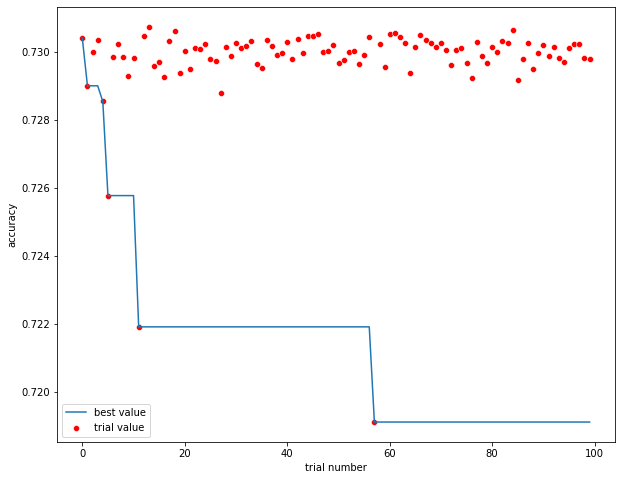

In [14]:
fig = plt.figure(figsize=(10, 8))
fig = sns.lineplot(x=df_optuna.index, y=df_optuna.value.cummin())
fig.set_xlabel('trial number')
sns.scatterplot(x=df_optuna.index, y=df_optuna.value, color='red')
fig.set_ylabel('log loss')
fig.legend(['best value', 'trial value'])

## Training Model

In [15]:
rf_clf = RandomForestClassifier(n_estimators=88, max_depth=50, max_features='sqrt',min_samples_leaf=39,criterion='entropy', min_samples_split=97, n_jobs=-1, random_state=23)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_leaf=39, min_samples_split=97,
                       n_estimators=88, n_jobs=-1, random_state=23)

### Prediction Probabilities

In [21]:
y_pred_proba = rf_clf.predict_proba(x_test)[::, 1] #somehow dimensions changes without [::, 1]. reshaping

### AUC & ROC

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

In [24]:
rfc_auc = roc_auc_score(y_test, y_pred_proba)
rfc_auc

0.797873120317425

In [26]:
r_probs = [0 for _ in range(len(y_test))]  #for the dashed line

In [27]:
r_auc = roc_auc_score(y_test, r_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)  #random
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba)  #rfc

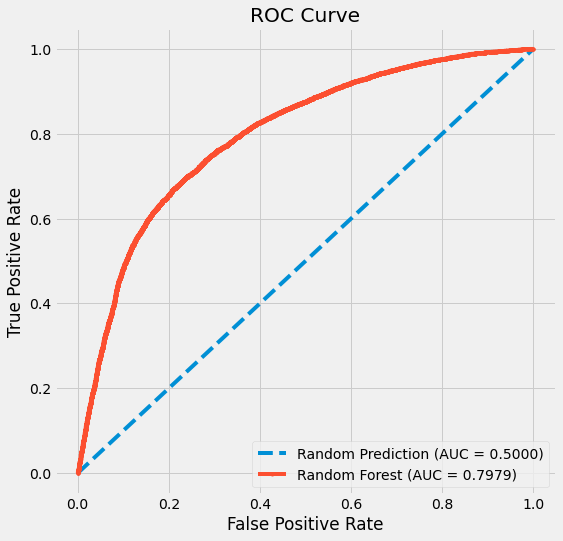

In [33]:
#plot ROC
plt.rcParams['figure.figsize'] = [8,8]
plt.style.use('fivethirtyeight')
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction (AUC = %0.4f)' % r_auc)
plt.plot(fpr, tpr, marker='.', label='Random Forest (AUC = %0.4f)' % rfc_auc)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Performance Evaluation

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [36]:
y_pred = rf_clf.predict(x_test)

In [37]:
accuracy_score(y_test, y_pred)

0.728410898455539

In [38]:
precision_score(y_test, y_pred)

0.757147624874847

In [39]:
recall_score(y_test, y_pred)

0.6863654699475595

In [40]:
f1_score(y_test, y_pred)

0.7200211584236973

### Confusion Matrx

In [42]:
conf_mat_rfc = confusion_matrix(y_test, y_pred)
conf_mat_rfc

array([[7390, 2183],
       [3110, 6806]], dtype=int64)

Text(24.58, 0.5, 'Actual Value')

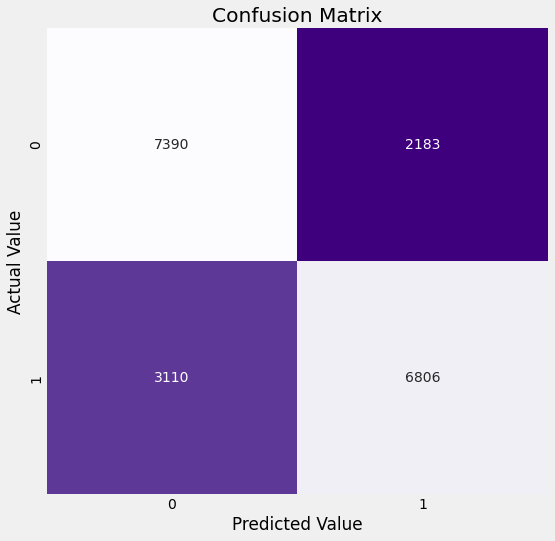

In [46]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.style.use('fivethirtyeight')
sns.heatmap(conf_mat_rfc, annot=True, fmt='.0f', cmap='Purples_r', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

### Cross Validate

In [47]:
from sklearn.model_selection import StratifiedKFold

In [49]:
strat_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=23)
rf_clf_cv = RandomForestClassifier(n_estimators=88, max_depth=50, max_features='sqrt',min_samples_leaf=39,criterion='entropy', min_samples_split=97, n_jobs=-1, random_state=23)

In [50]:
strat_scores = []
for train_index, test_index in strat_cv.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    rf_clf_cv.fit(x_train_fold, y_train_fold)
    y_pred_cv = rf_clf_cv.predict(x_test_fold)
    strat_scores.append(accuracy_score(y_test_fold, y_pred_cv))

In [51]:
strat_scores

[0.7326458365399415,
 0.7244882253347699,
 0.729413575496383,
 0.7336822660098522,
 0.7267549261083743,
 0.7299876847290641,
 0.7367610837438424,
 0.7313731527093597,
 0.7255233990147784,
 0.7267549261083743]

In [52]:
sum(strat_scores)/10

0.729738507579474

### Save Model

In [53]:
import pickle

In [54]:
with open ('rf_classifier.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)
f.close()

### Viz Model

In [58]:
from sklearn import tree
from dtreeviz.trees import DTreeVizAPI

In [60]:
len(rf_clf.estimators_)

88

In [75]:
plt.rcParams['figure.figsize'] = [20,20]

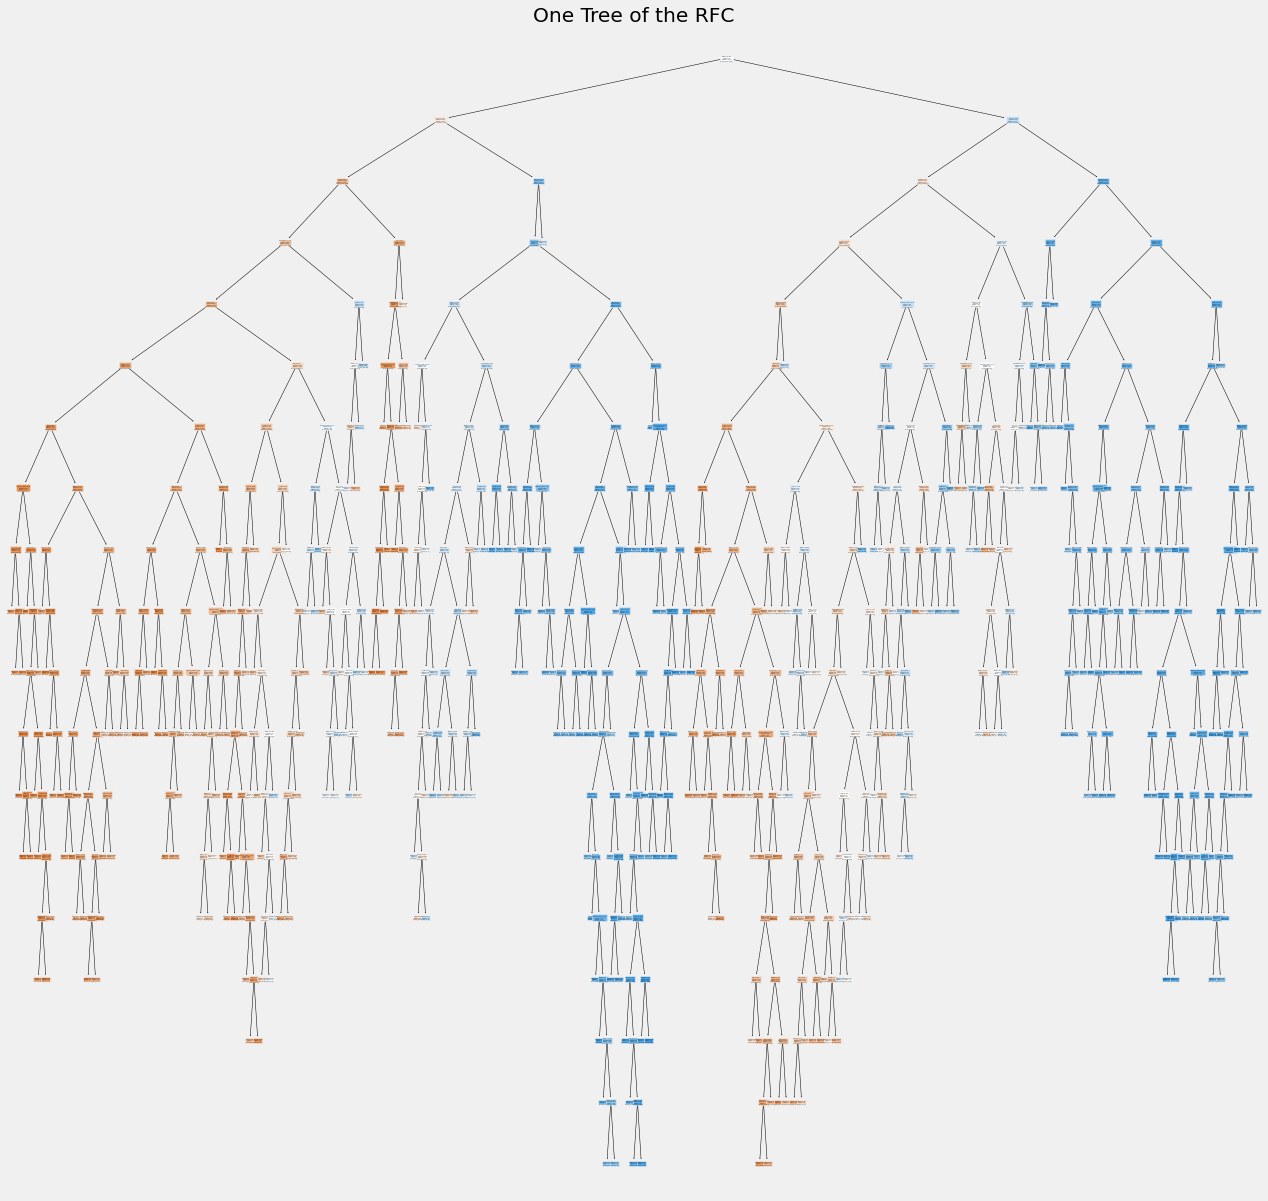

In [76]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf_clf.estimators_[0], feature_names=df_main.drop(['CARDIO_DISEASE'], axis=1).columns, filled=True)
plt.title('One Tree of the RFC')
plt.show()

In [71]:
rf_clf.estimators_[0].tree_.max_depth

18